DIABETES PREDICTION MODEL

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
db = pd.read_csv("diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [257]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [258]:
db.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [259]:
db.isnull().sum(0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [260]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [261]:
db.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Pregnancies')

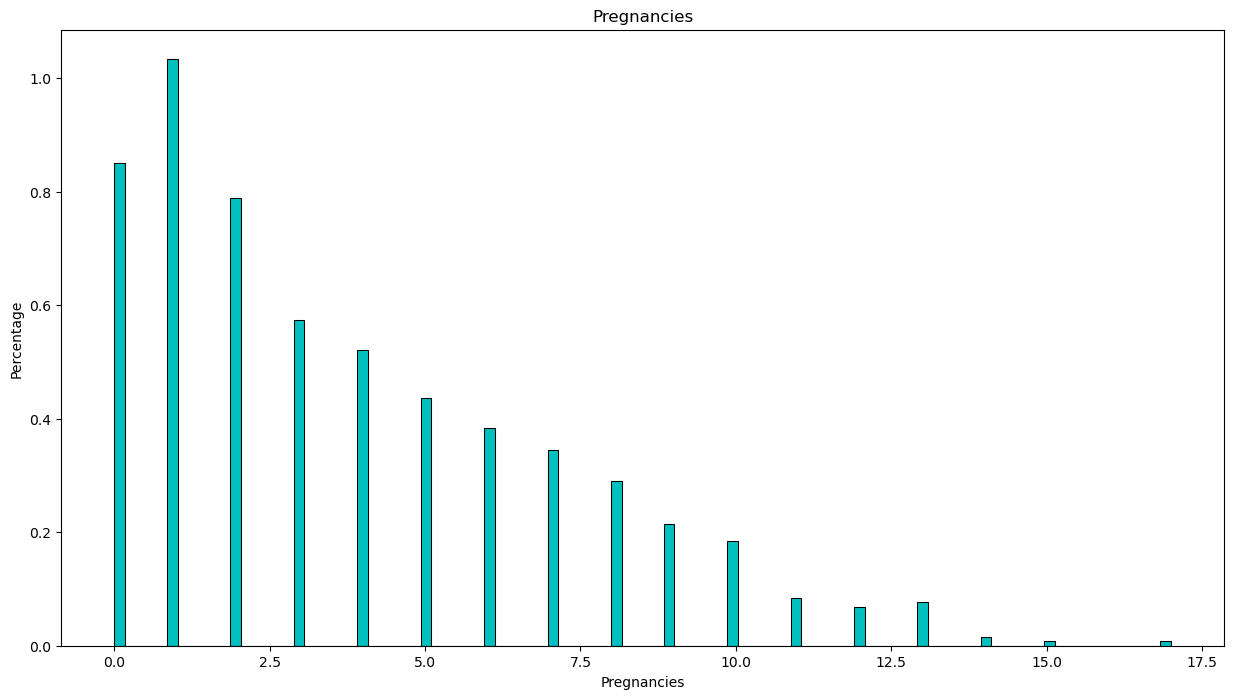

In [262]:
plt.figure(figsize=(15, 8))
sns.histplot(db["Pregnancies"], facecolor="c", bins=100, stat="density")
plt.ylabel("Percentage")
plt.title("Pregnancies")

Text(0.5, 1.0, 'BMI')

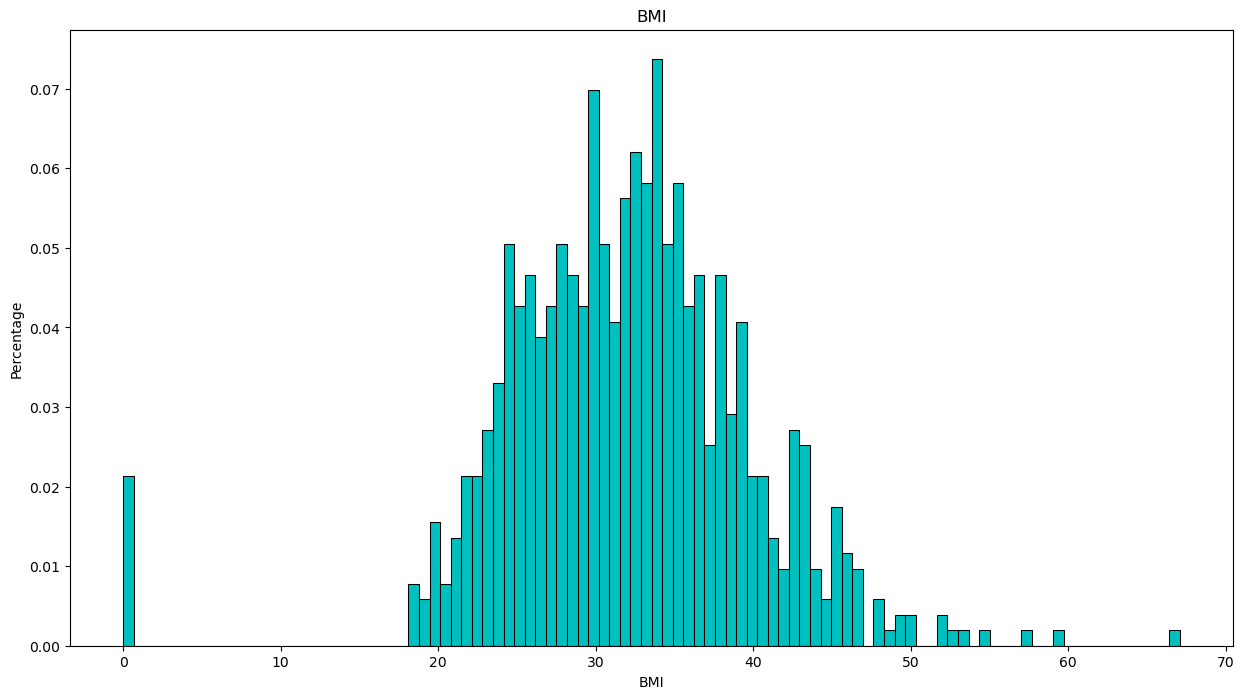

In [263]:
plt.figure(figsize=(15, 8))
sns.histplot(db["BMI"], facecolor="c", bins=100, stat="density")
plt.ylabel("Percentage")
plt.title("BMI")

Text(0.5, 1.0, 'Glucose')

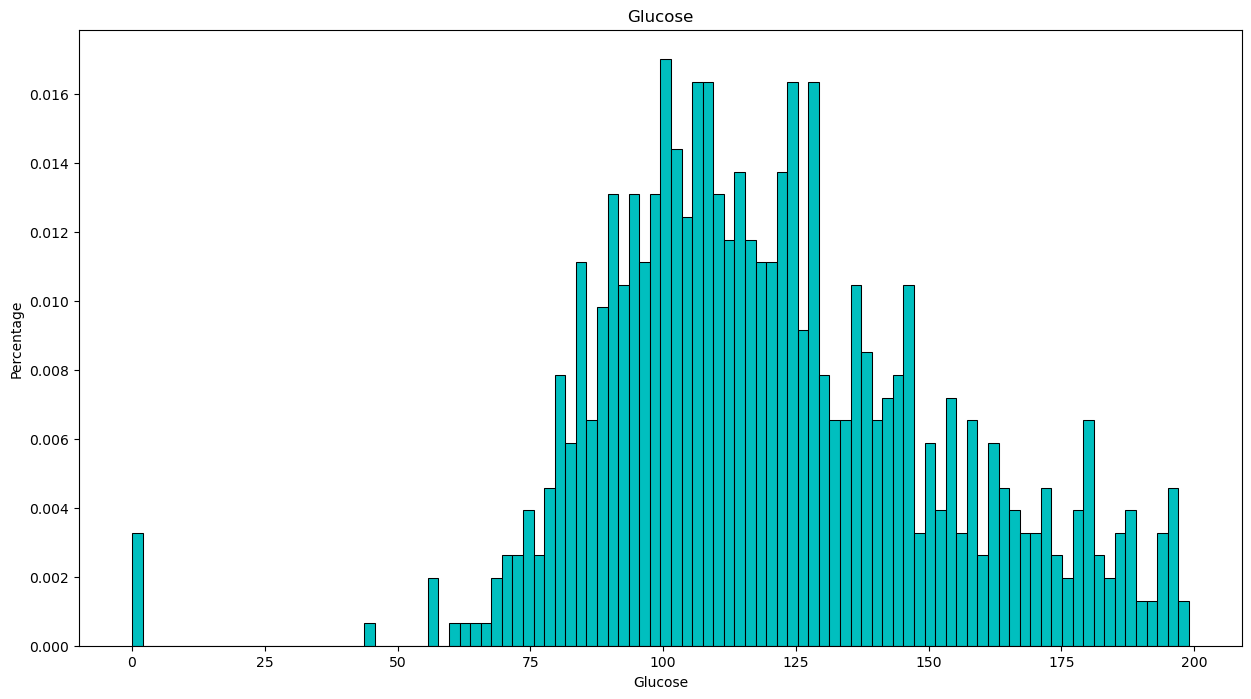

In [264]:
plt.figure(figsize=(15, 8))
sns.histplot(db["Glucose"], facecolor="c", bins=100, stat="density")
plt.ylabel("Percentage")
plt.title("Glucose")

<Axes: >

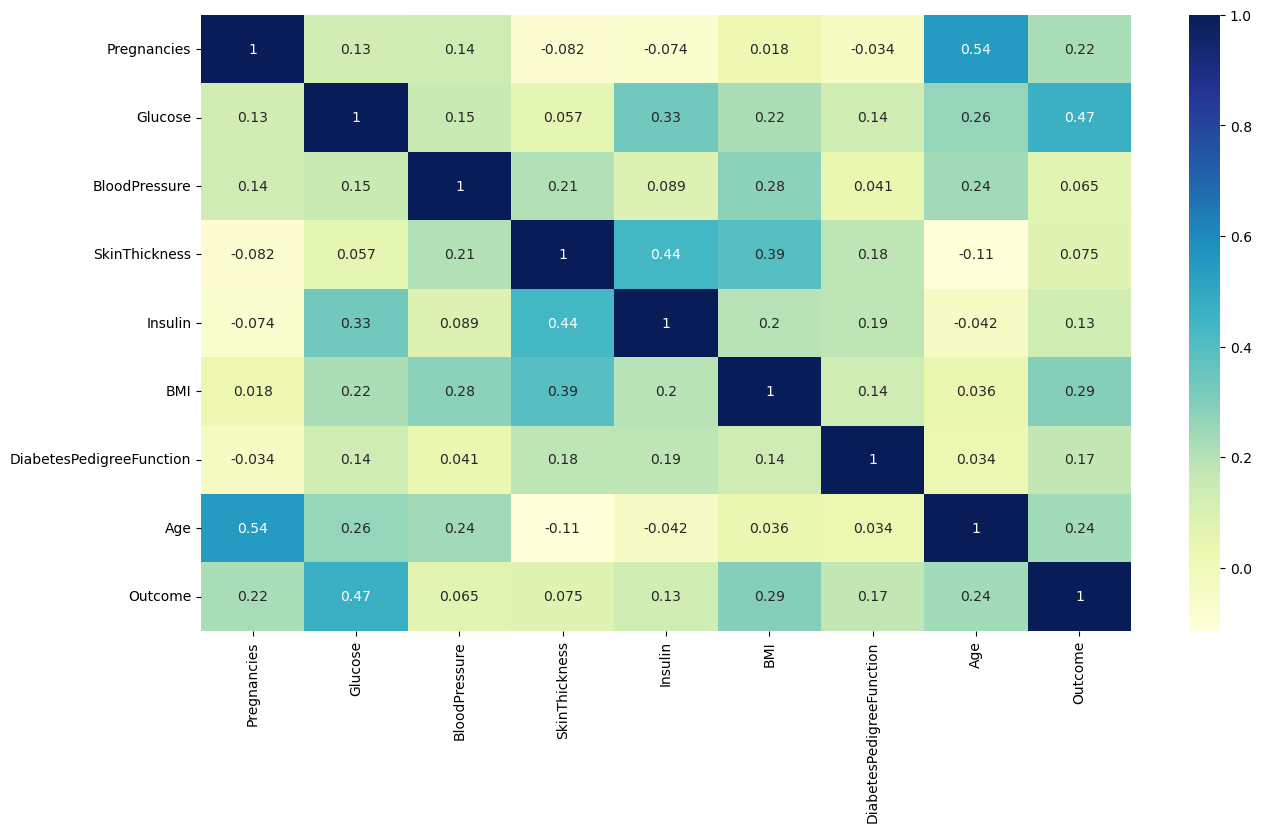

In [265]:
plt.figure(figsize=(15, 8))
sns.heatmap(db.corr(), annot = True, cmap = 'YlGnBu')

In [266]:
db["Outcome"].unique()

array([1, 0], dtype=int64)

Splitting the Dataset

In [267]:
from sklearn.model_selection import train_test_split
x = db.drop(["Outcome"], axis = 1)
y = db["Outcome"]


In [268]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [269]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [270]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(x,y)
score = classifier.feature_importances_
score

array([0.11514836, 0.23401091, 0.09876146, 0.07885891, 0.07526112,
       0.13891793, 0.11774991, 0.1412914 ])

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [272]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
660,10,162,84,0,0,27.7,0.182,54
69,4,146,85,27,100,28.9,0.189,27
85,2,110,74,29,125,32.4,0.698,27
219,5,112,66,0,0,37.8,0.261,41
712,10,129,62,36,0,41.2,0.441,38


In [273]:
y_train

660    0
69     0
85     0
219    1
712    1
      ..
578    0
53     1
350    0
79     0
520    0
Name: Outcome, Length: 614, dtype: int64

Building a DataFrame for Machine Learning Model and their Accuracy Levels

In [274]:
model_res = pd.DataFrame(columns=['Model', 'Score'])

LOGISTIC REGRESSION

In [275]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)

In [276]:
y_test_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [277]:
from sklearn.metrics import accuracy_score

model_res.loc[len(model_res)] = ["Logistic Regression", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,74.025974


K NEIGHBORS CLASSIFIER

In [278]:

from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["K Neighbors Classifier", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,74.025974
1,K Neighbors Classifier,75.324675


DECISION TREE CLASSIFIER

In [279]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

model_res.loc[len(model_res)] = ["Decision Tree Classifier", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,74.025974
1,K Neighbors Classifier,75.324675
2,Decision Tree Classifier,68.831169


RANDOM FOREST CLASSIFIER

In [280]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["Random Forest Classifier", accuracy_score(y_test, y_test_pred) * 100]
model_res


,Model,Score
0,Logistic Regression,74.025974
1,K Neighbors Classifier,75.324675
2,Decision Tree Classifier,68.831169
3,Random Forest Classifier,70.129870


SUPPORT VECTOR CLASSIFICATION

In [281]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ["Support Vector Classification", accuracy_score(y_test, y_test_pred)*100]
model_res

,Model,Score
0,Logistic Regression,74.025974
1,K Neighbors Classifier,75.324675
2,Decision Tree Classifier,68.831169
3,Random Forest Classifier,70.129870
4,Support Vector Classification,70.129870


In [282]:
model_res = model_res.sort_values(by = "Score", ascending = False)
model_res


,Model,Score
1,K Neighbors Classifier,75.324675
0,Logistic Regression,74.025974
3,Random Forest Classifier,70.129870
4,Support Vector Classification,70.129870
2,Decision Tree Classifier,68.831169
